<a href="https://colab.research.google.com/github/RPAD676Spring2025/lab-3-sai-hemanth-kalidindi/blob/main/Copy_of_Lab2_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#**Lab 2: Inferential Statistics in Python**
# RPAD 676: Data Science for the Public Good

## Author:Sai Hemanth Varma Kalidindi
## Date:2/27/2025

In [ ]:
# load libraries
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/My Drive/digital_services_data.csv"


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# List files in "My Drive" to confirm the dataset exists
!ls "/content/drive/My Drive/"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
'Colab Notebooks'
'digital_services_data (1).csv'
 dji_fly_20241228_081036_0065_1735402892809_photo.JPG
 image.jpg
 IMG_2062.jpeg
 Lab3_Assignment.ipynb
 Motor_Vehicle_Collisions_-_Crashes_20250220.csv
 Motor_Vehicle_Collisions_-_Vehicles_20250220.csv
'Passport .pdf'


In [ ]:
file_path = "/content/drive/My Drive/digital_services_data (1).csv"


In [ ]:
import pandas as pd

# Load the dataset with the correct file path
data = pd.read_csv(file_path)

# Display first few rows
print(data.head())


   user_id  TimeTaken  UserSatisfaction  Age  DisabilityStatus  \
0        2        919                 4   38                 0   
1        9        759                10   78                 0   
2       13        853                 8   45                 0   
3       15        503                 4   66                 0   
4       25        857                 7   69                 0   

   DigitalLiteracy  Gender EmploymentStatus EducationLevel InternetAccess  \
0                5  Female          Retired   Some College      Broadband   
1                5    Male         Employed    High School      Broadband   
2                3  Female       Unemployed       Bachelor      Broadband   
3                3    Male          Student       Bachelor      Broadband   
4                1  Female         Employed   Some College    Mobile Data   

   ErrorRates  RequestedHelp  SatisfactionOtherServices  WillingnessFutureUse  \
0           1              0                          6    

In [ ]:
print(data.info())  # Check dataset structure
print(data.columns)  # List all column names
print(data.shape)  # Get the number of rows and columns
print(data.isnull().sum())  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   user_id                    1000 non-null   int64 
 1   TimeTaken                  1000 non-null   int64 
 2   UserSatisfaction           1000 non-null   int64 
 3   Age                        1000 non-null   int64 
 4   DisabilityStatus           1000 non-null   int64 
 5   DigitalLiteracy            1000 non-null   int64 
 6   Gender                     1000 non-null   object
 7   EmploymentStatus           1000 non-null   object
 8   EducationLevel             1000 non-null   object
 9   InternetAccess             1000 non-null   object
 10  ErrorRates                 1000 non-null   int64 
 11  RequestedHelp              1000 non-null   int64 
 12  SatisfactionOtherServices  1000 non-null   int64 
 13  WillingnessFutureUse       1000 non-null   int64 
 14  ReceivesS

In [ ]:
print(data.info())  # Check dataset structure
print(data.columns)  # List all column names
print(data.shape)  # Get the number of rows and columns
print(data.isnull().sum())  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   user_id                    1000 non-null   int64 
 1   TimeTaken                  1000 non-null   int64 
 2   UserSatisfaction           1000 non-null   int64 
 3   Age                        1000 non-null   int64 
 4   DisabilityStatus           1000 non-null   int64 
 5   DigitalLiteracy            1000 non-null   int64 
 6   Gender                     1000 non-null   object
 7   EmploymentStatus           1000 non-null   object
 8   EducationLevel             1000 non-null   object
 9   InternetAccess             1000 non-null   object
 10  ErrorRates                 1000 non-null   int64 
 11  RequestedHelp              1000 non-null   int64 
 12  SatisfactionOtherServices  1000 non-null   int64 
 13  WillingnessFutureUse       1000 non-null   int64 
 14  ReceivesS

### Visualize Data

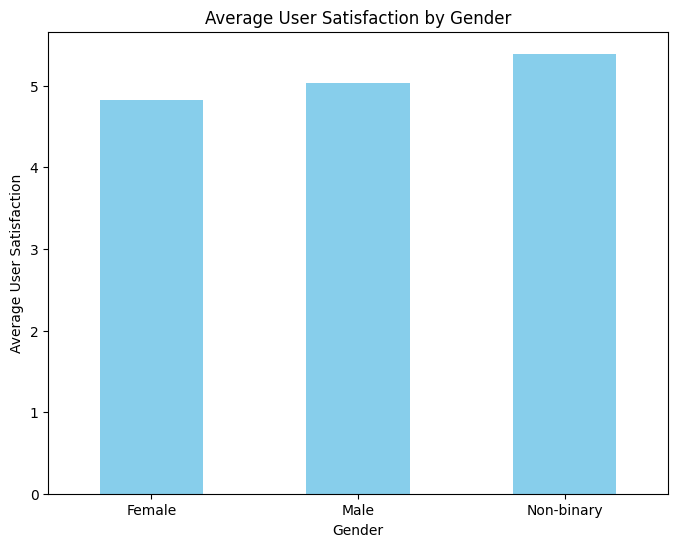

In [ ]:
# Bar Chart
import matplotlib.pyplot as plt

# Create the bar chart
data.groupby('Gender')['UserSatisfaction'].mean().sort_values().plot(
    kind='bar',
    color='skyblue',
    figsize=(8,6)
)

# Add labels and title
plt.xlabel("Gender")
plt.ylabel("Average User Satisfaction")
plt.title("Average User Satisfaction by Gender")
plt.xticks(rotation=0)  # Keep labels horizontal
plt.show()



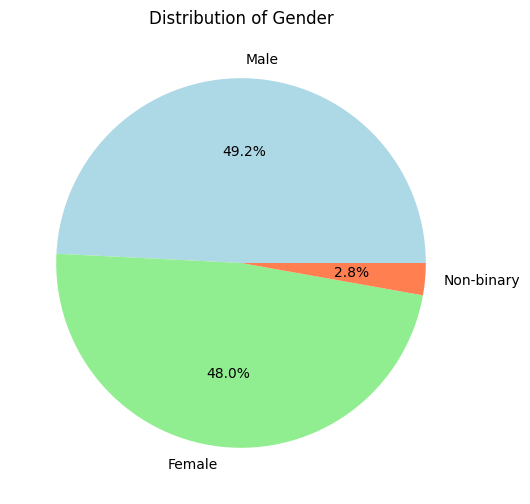

In [ ]:
import matplotlib.pyplot as plt

# Select a categorical variable (replace with the correct column)
categorical_counts = data['Gender'].value_counts()

# Create the Pie Chart
categorical_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=["lightblue", "lightgreen", "coral"],
    figsize=(6,6)
)

# Add title and remove y-label
plt.title("Distribution of Gender")
plt.ylabel("")  # Hide the y-axis label for better display
plt.show()


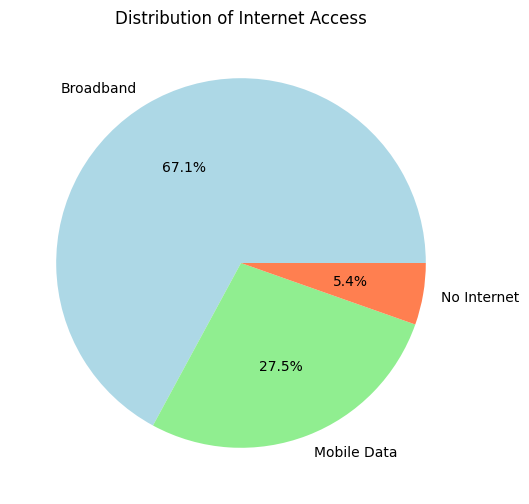

In [ ]:
categorical_counts = data['InternetAccess'].value_counts()
categorical_counts.plot(kind='pie', autopct='%1.1f%%', colors=["lightblue", "lightgreen", "coral"], figsize=(6,6))
plt.title("Distribution of Internet Access")
plt.ylabel("")
plt.show()


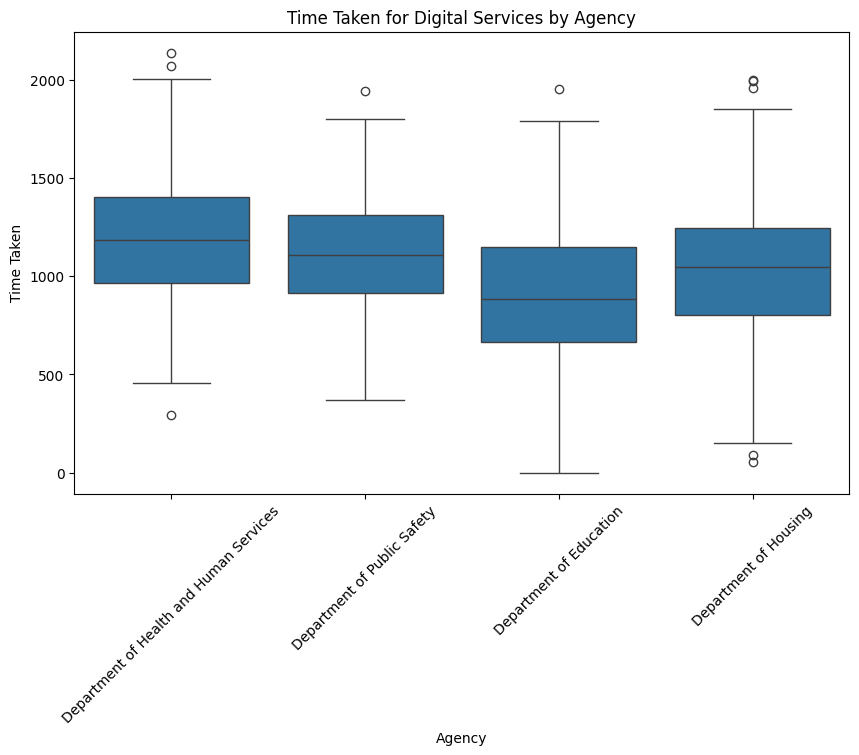

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot
plt.figure(figsize=(10,6))  # Adjust figure size for readability
sns.boxplot(x=data['Agency'], y=data['TimeTaken'])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title("Time Taken for Digital Services by Agency")
plt.xlabel("Agency")
plt.ylabel("Time Taken")
plt.show()


## Calculating Descriptive Statistics

In [ ]:
# Descriptive Statistics
print("Descriptive Statistics for Numeric Variables:")
print(data.describe())

Descriptive Statistics for Numeric Variables:
           user_id    TimeTaken  UserSatisfaction          Age  \
count  1000.000000  1000.000000       1000.000000  1000.000000   
mean    500.500000  1059.025000          4.946000    49.039000   
std     288.819436   344.668741          2.901293    17.891998   
min       1.000000     0.000000          1.000000    18.000000   
25%     250.750000   830.500000          2.000000    34.000000   
50%     500.500000  1064.000000          5.000000    50.000000   
75%     750.250000  1274.000000          7.000000    64.000000   
max    1000.000000  2136.000000         10.000000    79.000000   

       DisabilityStatus  DigitalLiteracy   ErrorRates  RequestedHelp  \
count       1000.000000      1000.000000  1000.000000    1000.000000   
mean           0.153000         3.053000     2.387000       0.287000   
std            0.360168         1.397907     2.384726       0.452588   
min            0.000000         1.000000     0.000000       0.000000   

In [ ]:
numeric_cols = data.select_dtypes
descriptive_stats = data.describe().round(2)
print("Descriptive Statistics for Numeric Variables:")
print(data.describe())

Descriptive Statistics for Numeric Variables:
           user_id    TimeTaken  UserSatisfaction          Age  \
count  1000.000000  1000.000000       1000.000000  1000.000000   
mean    500.500000  1059.025000          4.946000    49.039000   
std     288.819436   344.668741          2.901293    17.891998   
min       1.000000     0.000000          1.000000    18.000000   
25%     250.750000   830.500000          2.000000    34.000000   
50%     500.500000  1064.000000          5.000000    50.000000   
75%     750.250000  1274.000000          7.000000    64.000000   
max    1000.000000  2136.000000         10.000000    79.000000   

       DisabilityStatus  DigitalLiteracy   ErrorRates  RequestedHelp  \
count       1000.000000      1000.000000  1000.000000    1000.000000   
mean           0.153000         3.053000     2.387000       0.287000   
std            0.360168         1.397907     2.384726       0.452588   
min            0.000000         1.000000     0.000000       0.000000   

In [ ]:
# Frequency Distributions for Categorical Variables

print("\nFrequency Distribution for Categorical Variables:")
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"\n{col}:")
    print(data[col].value_counts())


Frequency Distribution for Categorical Variables:

Gender:
Gender
Male          492
Female        480
Non-binary     28
Name: count, dtype: int64

EmploymentStatus:
EmploymentStatus
Employed      603
Unemployed    160
Retired       133
Student       104
Name: count, dtype: int64

EducationLevel:
EducationLevel
Some College    297
High School     297
Bachelor        261
Graduate        145
Name: count, dtype: int64

InternetAccess:
InternetAccess
Broadband      671
Mobile Data    275
No Internet     54
Name: count, dtype: int64

Agency:
Agency
Department of Public Safety                274
Department of Education                    250
Department of Housing                      246
Department of Health and Human Services    230
Name: count, dtype: int64


In [ ]:
# Correct column name
user_satisfaction = 'UserSatisfaction'

# Calculate mean and round to 2 decimal places
mean_value_user_satisfaction = data[user_satisfaction].mean().round(2)

# Print the result
print(f"\nMean of {user_satisfaction}: {mean_value_user_satisfaction}")



Mean of UserSatisfaction: 4.95


In [ ]:
# Ensure numeric_cols is a list of column names, not a DataFrame
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()

# Define the categorical grouping variable
grouping_variable = 'EmploymentStatus'  # Ensure this column exists in the dataset

# Compute mean values for numeric variables grouped by the categorical variable
grouped_means = data.groupby(grouping_variable)[numeric_cols].mean().round(2)

# Display results
print(f"\nMean values of continuous variables grouped by {grouping_variable}:")
print(grouped_means)



Mean values of continuous variables grouped by EmploymentStatus:
                  user_id  TimeTaken  UserSatisfaction    Age  \
EmploymentStatus                                                
Employed           493.88    1078.29              4.86  49.10   
Retired            475.49    1067.10              4.87  51.26   
Student            521.65     970.91              5.26  46.97   
Unemployed         532.50    1036.97              5.13  48.32   

                  DisabilityStatus  DigitalLiteracy  ErrorRates  \
EmploymentStatus                                                  
Employed                      0.14             3.03        2.39   
Retired                       0.16             2.95        2.40   
Student                       0.15             3.12        2.22   
Unemployed                    0.19             3.19        2.47   

                  RequestedHelp  SatisfactionOtherServices  \
EmploymentStatus                                             
Employed        

## Hypothesis Testing

In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#### T-Tests - Comparing Means Across Two Groups

In [ ]:
# Calculate the mean of a specific continuous variable across one categorical variable
outcome_variable = 'DigitalLiteracy'  # Change to the variable of interest
categorical_variable = 'ReceivesSocialServices'  # Change to the desired categorical variable

specific_grouped_means = data.groupby(categorical_variable)[outcome_variable].mean().round(2)

print(f"\nMean of {outcome_variable} grouped by {categorical_variable}:")
print(specific_grouped_means)


Mean of DigitalLiteracy grouped by ReceivesSocialServices:
ReceivesSocialServices
0    2.96
1    3.11
Name: DigitalLiteracy, dtype: float64


In [ ]:
from scipy import stats

# Perform independent T-Test
t_stat, p_val = stats.ttest_ind(
    data[data['ReceivesSocialServices'] == 1]['ErrorRates'],
    data[data['ReceivesSocialServices'] == 0]['ErrorRates']
)

# Print results with correct description
print(f"T-Test: Effect of Receiving Social Services on Error Rates\n"
      f"T-statistic = {t_stat:.4f}, P-value = {p_val:.4f}")


T-Test: Effect of Receiving Social Services on Error Rates
T-statistic = -1.1014, P-value = 0.2710


#### ANOVA - Comparing Means Across Three or More Groups

In [ ]:
# Replace with actual column names
outcome_variable = 'UserSatisfaction'  # Continuous variable of interest
categorical_variable = 'Agency'  # Categorical variable to group by

# Compute mean for each group
specific_grouped_means = data.groupby(categorical_variable)[outcome_variable].mean().round(2)

# Display results
print(f"\nMean of {outcome_variable} grouped by {categorical_variable}:")
print(specific_grouped_means)



Mean of UserSatisfaction grouped by Agency:
Agency
Department of Education                    5.13
Department of Health and Human Services    4.70
Department of Housing                      4.88
Department of Public Safety                5.04
Name: UserSatisfaction, dtype: float64


In [ ]:
outcome_variable = 'TimeTaken'
categorical_variable = 'EmploymentStatus'


In [ ]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Define variables
outcome_variable = 'UserSatisfaction'  # Continuous variable
categorical_variable = 'Agency'  # Categorical variable

# Perform ANOVA
model = smf.ols(f"{outcome_variable} ~ C({categorical_variable})", data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Display ANOVA results
print("\nANOVA Results:")
print(anova_table)



ANOVA Results:
                sum_sq     df         F    PR(>F)
C(Agency)    25.144653    3.0  0.995716  0.394072
Residual   8383.939347  996.0       NaN       NaN


## Regression Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import statsmodels.api as sm

# Replace 'TimeTaken' with your predictor variable
X = data[['TimeTaken']]  # Independent variable

# Replace 'UserSatisfaction' with your dependent variable
y = data['UserSatisfaction']  # Dependent variable

# Add a constant (intercept) to the model
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Display the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       UserSatisfaction   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     28.96
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           9.21e-08
Time:                        00:00:18   Log-Likelihood:                -2469.3
No. Observations:                1000   AIC:                             4943.
Df Residuals:                     998   BIC:                             4952.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4430      0.293     22.025      0.0

In [ ]:
# Display Regression Results in a Nice Table
print("\nSimple Linear Regression Results:")
print(model.summary())


Simple Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:       UserSatisfaction   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     28.96
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           9.21e-08
Time:                        00:00:26   Log-Likelihood:                -2469.3
No. Observations:                1000   AIC:                             4943.
Df Residuals:                     998   BIC:                             4952.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.

In [ ]:
new_data = pd.DataFrame({'TimeTaken': [500, 700, 900]})  # Example new values
new_data = sm.add_constant(new_data)
predictions = model.predict(new_data)

print("\nPredicted User Satisfaction:")
print(predictions)



Predicted User Satisfaction:
0    5.736199
1    5.453493
2    5.170787
dtype: float64


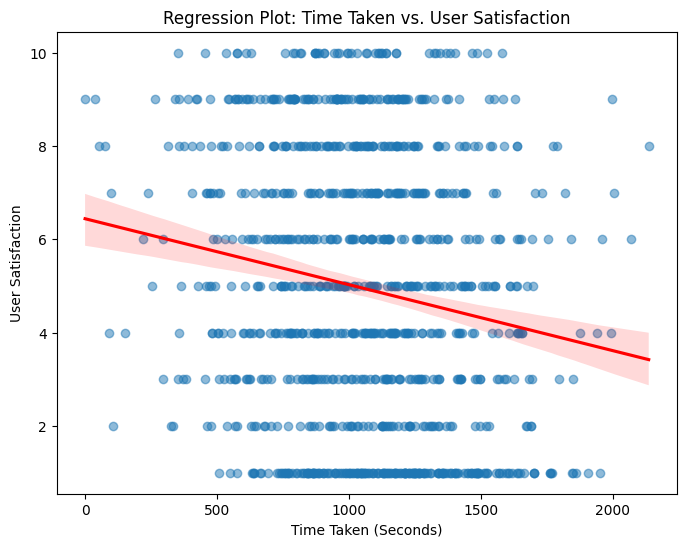

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace with actual column names from your dataset
x_variable = 'TimeTaken'  # Independent variable (predictor)
y_variable = 'UserSatisfaction'  # Dependent variable (outcome)

# Create regression plot
plt.figure(figsize=(8,6))
sns.regplot(x=data[x_variable], y=data[y_variable],
            scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Add labels and title
plt.xlabel("Time Taken (Seconds)")  # Update label
plt.ylabel("User Satisfaction")  # Update label
plt.title("Regression Plot: Time Taken vs. User Satisfaction")  # Update title

# Show the plot
plt.show()


#### Multiple Regression

In [ ]:
import statsmodels.api as sm

# Replace with actual predictor variables (independent variables)
X = data[['TimeTaken', 'DigitalLiteracy']]  # Choose multiple independent variables

# Replace with actual dependent variable (outcome variable)
y = data['UserSatisfaction']

# Add an intercept (constant term)
X = sm.add_constant(X)

# Fit the multiple linear regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:       UserSatisfaction   R-squared:                       0.316
Model:                            OLS   Adj. R-squared:                  0.315
Method:                 Least Squares   F-statistic:                     230.8
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           4.22e-83
Time:                        00:21:51   Log-Likelihood:                -2293.3
No. Observations:                1000   AIC:                             4593.
Df Residuals:                     997   BIC:                             4607.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.7214      0.337     

In [ ]:
# Display Regression Results in a Nice Table
print("\nMultiple Linear Regression Results:")
print(model.summary())


Multiple Linear Regression Results:
                            OLS Regression Results                            
Dep. Variable:       UserSatisfaction   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     28.96
Date:                Fri, 28 Feb 2025   Prob (F-statistic):           9.21e-08
Time:                        00:19:56   Log-Likelihood:                -2469.3
No. Observations:                1000   AIC:                             4943.
Df Residuals:                     998   BIC:                             4952.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          